In [19]:
import os
from glob import glob
import time
import re
import argparse
import nibabel as nib
import pandas as pd
from medpy.metric.binary import hd, dc
import numpy as np
import json

In [20]:
import matplotlib.pyplot as plt

In [25]:
image_data_path="/home/annalena/Seminar_Medical_Image_Analysis/code/data/ACDC/training/"
p="patient001"

In [26]:
def load_nii(img_path):
    """
    Function to load a 'nii' or 'nii.gz' file, The function returns
    everyting needed to save another 'nii' or 'nii.gz'
    in the same dimensional space, i.e. the affine matrix and the header

    Parameters
    ----------

    img_path: string
    String with the path of the 'nii' or 'nii.gz' image file name.

    Returns
    -------
    Three element, the first is a numpy array of the image values,
    the second is the affine transformation of the image, and the
    last one is the header of the image.
    """
    nimg = nib.load(img_path)
    return nimg.get_data(), nimg.affine, nimg.header



In [27]:
test_mask, _, header = load_nii(os.path.join(image_data_path,p,"patient001_frame01_gt.nii.gz"))

test_image, _, header = load_nii(os.path.join(image_data_path,p,"patient001_frame01.nii.gz"))

/tmp/ipykernel_1461218/2801047306.py:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  return nimg.get_data(), nimg.affine, nimg.header


In [28]:
(test_image).shape

(216, 256, 10)

In [35]:
#check the lables
np.unique(test_mask)
from matplotlib.colors import ListedColormap

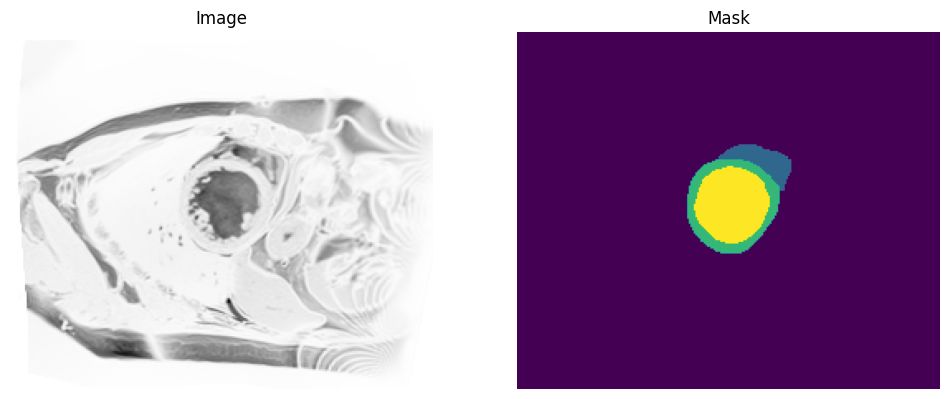

In [47]:
i = 5
my_cmap = ListedColormap(['grey', 'y','g','orange'])
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[:, :, i], cmap = 'Greys')
ax1.set_title('Image')
ax2.imshow(test_mask[:, :, i])
ax2.set_title('Mask')
ax1.axis('off')
ax2.axis('off')
plt.show()

In [12]:
test_data_path = "/home/annalena/Seminar_Medical_Image_Analysis/code/data/Task679_mnm" + "/splitted_all_timesteps/imagesTr/split_raw_images/"

#test_mask, _, header = load_nii(os.path.join(test_data_path,"A2E3W4_sa_gt.nii.gz"))

test_image, _, header = load_nii(os.path.join(test_data_path,"A7O4T6_sa_0002.nii.gz"))

/tmp/ipykernel_1461218/2801047306.py:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  return nimg.get_data(), nimg.affine, nimg.header


In [13]:
test_image.shape

(196, 240, 12)

Text(0.5, 1.0, 'Mask')

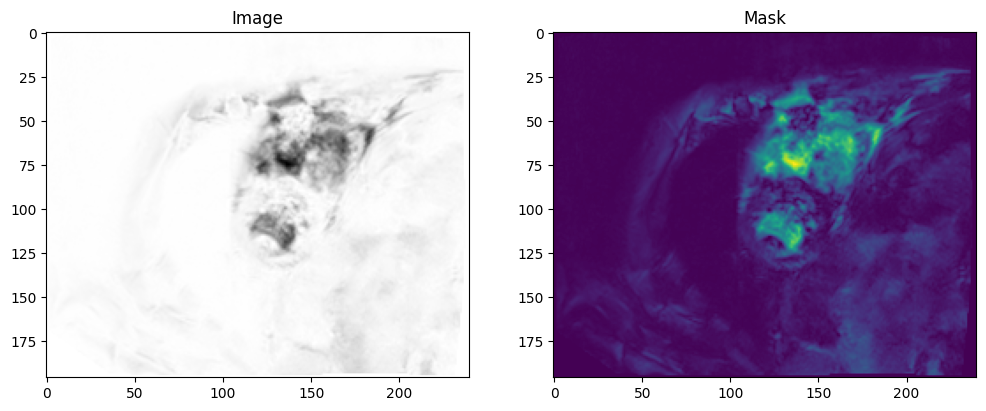

In [15]:
i = 7
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[:, :, i], cmap='Greys')
ax1.set_title('Image')
ax2.imshow(test_image[:, :, i])
ax2.set_title('Mask')

In [ ]:
# content of cfg-file:


In [ ]:
#write json file
with open('data.json', 'w+', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [ ]:



HEADER = ["Name", "Dice LV", "Volume LV", "Err LV(ml)",
          "Dice RV", "Volume RV", "Err RV(ml)",
          "Dice MYO", "Volume MYO", "Err MYO(ml)"]

#
# Utils functions used to sort strings into a natural order
#
def conv_int(i):
    return int(i) if i.isdigit() else i


def natural_order(sord):
    """
    Sort a (list,tuple) of strings into natural order.

    Ex:

    ['1','10','2'] -> ['1','2','10']

    ['abc1def','ab10d','b2c','ab1d'] -> ['ab1d','ab10d', 'abc1def', 'b2c']

    """
    if isinstance(sord, tuple):
        sord = sord[0]
    return [conv_int(c) for c in re.split(r'(\d+)', sord)]


#
# Utils function to load and save nifti files with the nibabel package
#
def load_nii(img_path):
    """
    Function to load a 'nii' or 'nii.gz' file, The function returns
    everyting needed to save another 'nii' or 'nii.gz'
    in the same dimensional space, i.e. the affine matrix and the header

    Parameters
    ----------

    img_path: string
    String with the path of the 'nii' or 'nii.gz' image file name.

    Returns
    -------
    Three element, the first is a numpy array of the image values,
    the second is the affine transformation of the image, and the
    last one is the header of the image.
    """
    nimg = nib.load(img_path)
    return nimg.get_data(), nimg.affine, nimg.header


def save_nii(img_path, data, affine, header):
    """
    Function to save a 'nii' or 'nii.gz' file.

    Parameters
    ----------

    img_path: string
    Path to save the image should be ending with '.nii' or '.nii.gz'.

    data: np.array
    Numpy array of the image data.

    affine: list of list or np.array
    The affine transformation to save with the image.

    header: nib.Nifti1Header
    The header that define everything about the data
    (pleasecheck nibabel documentation).
    """
    nimg = nib.Nifti1Image(data, affine=affine, header=header)
    nimg.to_filename(img_path)


#
# Functions to process files, directories and metrics
#
def metrics(img_gt, img_pred, voxel_size):
    """
    Function to compute the metrics between two segmentation maps given as input.

    Parameters
    ----------
    img_gt: np.array
    Array of the ground truth segmentation map.

    img_pred: np.array
    Array of the predicted segmentation map.

    voxel_size: list, tuple or np.array
    The size of a voxel of the images used to compute the volumes.

    Return
    ------
    A list of metrics in this order, [Dice LV, Volume LV, Err LV(ml),
    Dice RV, Volume RV, Err RV(ml), Dice MYO, Volume MYO, Err MYO(ml)]
    """

    if img_gt.ndim != img_pred.ndim:
        raise ValueError("The arrays 'img_gt' and 'img_pred' should have the "
                         "same dimension, {} against {}".format(img_gt.ndim,
                                                                img_pred.ndim))

    res = []
    # Loop on each classes of the input images
    for c in [3, 1, 2]:
        # Copy the gt image to not alterate the input
        gt_c_i = np.copy(img_gt)
        gt_c_i[gt_c_i != c] = 0

        # Copy the pred image to not alterate the input
        pred_c_i = np.copy(img_pred)
        pred_c_i[pred_c_i != c] = 0

        # Clip the value to compute the volumes
        gt_c_i = np.clip(gt_c_i, 0, 1)
        pred_c_i = np.clip(pred_c_i, 0, 1)

        # Compute the Dice
        dice = dc(gt_c_i, pred_c_i)

        # Compute volume
        volpred = pred_c_i.sum() * np.prod(voxel_size) / 1000.
        volgt = gt_c_i.sum() * np.prod(voxel_size) / 1000.

        res += [dice, volpred, volpred-volgt]

    return res


def compute_metrics_on_files(path_gt, path_pred):
    """
    Function to give the metrics for two files

    Parameters
    ----------

    path_gt: string
    Path of the ground truth image.

    path_pred: string
    Path of the predicted image.
    """
    gt, _, header = load_nii(path_gt)
    pred, _, _ = load_nii(path_pred)
    zooms = header.get_zooms()

    name = os.path.basename(path_gt)
    name = name.split('.')[0]
    res = metrics(gt, pred, zooms)
    res = ["{:.3f}".format(r) for r in res]

    formatting = "{:>14}, {:>7}, {:>9}, {:>10}, {:>7}, {:>9}, {:>10}, {:>8}, {:>10}, {:>11}"
    print(formatting.format(*HEADER))
    print(formatting.format(name, *res))


def compute_metrics_on_directories(dir_gt, dir_pred):
    """
    Function to generate a csv file for each images of two directories.

    Parameters
    ----------

    path_gt: string
    Directory of the ground truth segmentation maps.

    path_pred: string
    Directory of the predicted segmentation maps.
    """
    lst_gt = sorted(glob(os.path.join(dir_gt, '*')), key=natural_order)
    lst_pred = sorted(glob(os.path.join(dir_pred, '*')), key=natural_order)

    res = []
    for p_gt, p_pred in zip(lst_gt, lst_pred):
        if os.path.basename(p_gt) != os.path.basename(p_pred):
            raise ValueError("The two files don't have the same name"
                             " {}, {}.".format(os.path.basename(p_gt),
                                               os.path.basename(p_pred)))

        gt, _, header = load_nii(p_gt)
        pred, _, _ = load_nii(p_pred)
        zooms = header.get_zooms()
        res.append(metrics(gt, pred, zooms))

    lst_name_gt = [os.path.basename(gt).split(".")[0] for gt in lst_gt]
    res = [[n,] + r for r, n in zip(res, lst_name_gt)]
    df = pd.DataFrame(res, columns=HEADER)
    df.to_csv("results_{}.csv".format(time.strftime("%Y%m%d_%H%M%S")), index=False)

def main(path_gt, path_pred):
    """
    Main function to select which method to apply on the input parameters.
    """
    if os.path.isfile(path_gt) and os.path.isfile(path_pred):
        compute_metrics_on_files(path_gt, path_pred)
    elif os.path.isdir(path_gt) and os.path.isdir(path_pred):
        compute_metrics_on_directories(path_gt, path_pred)
    else:
        raise ValueError(
            "The paths given needs to be two directories or two files.")


if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description="Script to compute ACDC challenge metrics.")
    parser.add_argument("GT_IMG", type=str, help="Ground Truth image")
    parser.add_argument("PRED_IMG", type=str, help="Predicted image")
    args = parser.parse_args()
    main(args.GT_IMG, args.PRED_IMG)